In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [91]:
L = 0.509
T = .149 * 9.8

def freq_model(n, mu):
    return n / (2 * L * np.sqrt(mu / T))

def calc_norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 


In [92]:
n = np.array([1,2,3,4,5,6,7])
freq = np.array([28,40.5,58.75,78,97.5,116.5,134.25])
freq_err = np.array([3.5,2.5,1,.88,1,1,1.25])


In [93]:
parameters, covariance = opt.curve_fit(freq_model, n, freq, p0=[.004], sigma=freq_err, absolute_sigma=True)

mu = parameters[0]
mu_err = np.sqrt(np.diag(covariance))[0]

fitted_freq = freq_model(n, mu)
norm_res = calc_norm_res(fitted_freq, freq, freq_err)
chi2 = np.sum(norm_res ** 2)
red_chi2 = chi2 / (7 - 1)


1.466079410125194

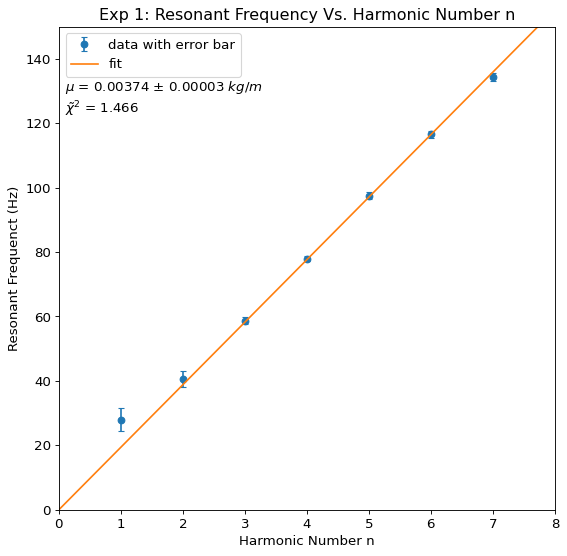

In [99]:
# Plotting data time!

fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(n, freq, yerr=freq_err, fmt='o', capsize = 3, capthick = 1, label="data with error bar")
plt.errorbar(np.linspace(0,10), freq_model(np.linspace(0,10), mu), label='fit')

plt.title("Exp 1: Resonant Frequency Vs. Harmonic Number n")
plt.xlabel("Harmonic Number n")
plt.ylabel("Resonant Frequenct (Hz)")

plt.text(0.1,130, r'$\mu$ = %5.5f ± %5.5f $kg/m$' % (mu, mu_err))
plt.text(0.1,123, r'$\tilde{\chi}^2$ = %5.3f' % red_chi2)
plt.xlim(0, 8)
plt.ylim(0, 150)
plt.legend()
plt.show()



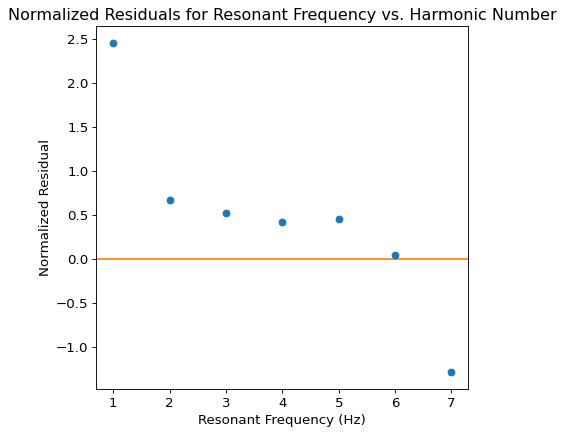

In [100]:
# Plotting residuals time!

fig2=plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(n, norm_res, fmt='o')
plt.axhline(color='tab:orange')

plt.title("Normalized Residuals for Resonant Frequency vs. Harmonic Number")
plt.xlabel("Resonant Frequency (Hz)")
plt.ylabel("Normalized Residual")
plt.show()
